<a href="https://colab.research.google.com/github/mathnick/Z4-Formalism/blob/main/Z4_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

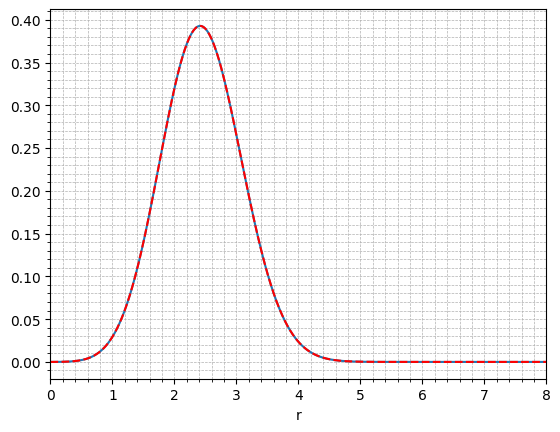

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 70                                                   # Truncation ordem

L0 = 1                                             # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)
r = np.flip(r1)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)

r0 = 2

sigma = 1

A0 = 0.08  # 0.08 -> disperses ; # 0.09-> disperses ;

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()


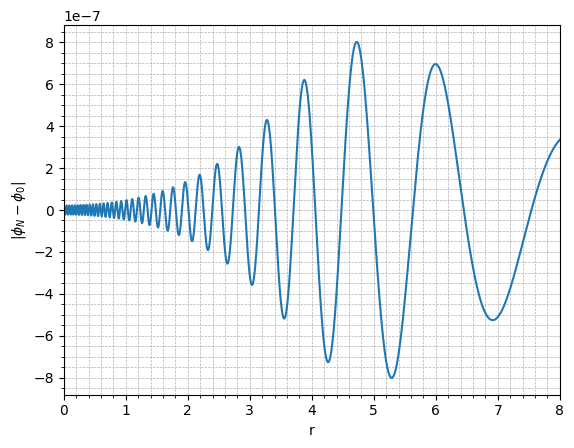

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel(r"$|\phi_N - \phi_0|$")
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

Chi=np.dot(c0,psi)
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:
while n <= nf:
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
#  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew
  n = n + 1

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


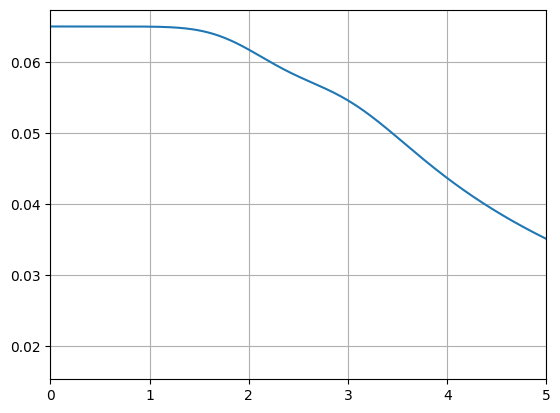

In [4]:
Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.grid()
plt.show()

In [5]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

inv_SB2 = np.linalg.pinv(SB2)

# Base para Z (mesma base do Beta - usando SB2)
z0 = np.zeros(N+1)     # Z inicial = zero
Z = np.dot(z0, SB2)
rZ = np.dot(z0, rSB2)

# Base para Theta (mesma base do Alpha - usando psi)
theta0 = np.zeros(N+1)  # Theta inicial = zero
Theta = np.dot(theta0, psi)
rTheta = np.dot(theta0, rpsi)


In [6]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])

qSB2 = np.zeros([N+1, Nq+1])
rqSB2 = np.zeros([N+1, Nq+1])

for i in range(N+1):
  qSB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/rq))

for i in range(N+1):
  rqSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/rq))*(2*i+2)*L0/(rq**2*(1+L0**2/rq**2))


#qSB2 = np.zeros([N+1, Nq+1])
#rqSB2 = np.zeros([N+1, Nq+1])
#inv_SB2 = np.linalg.inv(SB2)

#for i in range(N+1):
  #qSB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/rq))

#for i in range(N+1):
  #rqSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/rq))*(2*i+2)*L0/(rq**2*(1+L0**2/rq**2))

#for i in range(N+1):
  #rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)


#inv_SB2 = np.linalg.inv(SB2)


#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2

# # Base para Theta (mesma base do Alpha - usando psi)
# theta0 = np.zeros(N+1)  # Theta inicial = zero
# Theta = np.dot(theta0, psi)
# rTheta = np.dot(theta0, rpsi)

# # Base para Z (mesma base do Beta - usando SB2)
# z0 = np.zeros(N+1)     # Z inicial = zero
# Z = np.dot(z0, SB2)
# rZ = np.dot(z0, rSB2)

# Inicialização nos pontos de quadratura
qTheta = np.dot(theta0, qpsi)
qZ = np.dot(z0, qSB2)
rqZ = np.dot(z0, rqSB2)

#Alpha_0 = 1 + np.dot(al0, psi_0)

In [7]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 10

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [8]:
# Runge Kutta 4th order - VERSÃO COMPLETA COM ADM E Z4 COMENTADO

h = 0.0002   # step size
tf = 7
It = int(tf/h)

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []
Madm_error = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)
out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0
M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

while t <= tf:
    # =============================================
    # PRIMEIRO ESTÁGIO RK4
    # =============================================

    # Recuperar variáveis atuais
    Phi_1 = np.dot(a0, psi)
    rPhi_1 = np.dot(a0, rpsi)
    rrPhi_1 = np.dot(a0, rrpsi)
    Pi_1 = np.dot(b0, psi)
    rPi_1 = np.dot(b0, rpsi)
    Chi_1 = np.dot(c0, psi)
    rChi_1 = np.dot(c0, rpsi)
    rrChi_1 = np.dot(c0, rrpsi)

    #VARIÁVEIS Z4 (COMENTADAS/OPCIONAIS)
    Theta_1 = np.dot(theta0, psi)
    rTheta_1 = np.dot(theta0, rpsi)
    Z_1 = np.dot(z0, SB2)
    rZ_1 = np.dot(z0, rSB2)

    #e4Chi_1 = np.exp(4*Chi_1)

    # Equação para Krr (MOMENTUM CONSTRAINT) - MESMA PARA ADM E Z4
    Matrix_Krr_1 = 2*rChi_1*SB1 + rSB1 + 3/r*SB1
    inv_matrix_krr_1 = np.linalg.inv(Matrix_Krr_1)
    rhsk_1 = - Pi_1*rPhi_1*np.exp(4*Chi_1)
    ck0_1 = np.dot(rhsk_1, inv_matrix_krr_1)
    Krr_1 = np.dot(ck0_1, SB1)
    rKrr_1 = np.dot(ck0_1, rSB1)

    # EQUAÇÃO DO LAPSE - VERSÃO ADM (ORIGINAL FUNCIONANDO)
    # Matrix_Alpha_1 = (rrpsi + 2*(1/r + rChi_1)*rpsi -
    #                  3/2*np.exp(-4*Chi_1)*Krr_1**2*psi -
    #                  e4Chi_1*(Pi_1**2 - V)*psi)
    # inv_matrix_alpha_1 = np.linalg.inv(Matrix_Alpha_1)
    # rhsal_1 = (3/2*np.exp(-4*Chi_1)*Krr_1**2 + e4Chi_1*(Pi_1**2 - V))

    # EQUAÇÃO DO LAPSE - VERSÃO Z4 (COMENTADA/ALTERNATIVA)
    # Matrix_Alpha_1 = (rrpsi + 2*(1/r + rChi_1)*rpsi -
    #                  (3/2)*np.exp(-4*Chi_1)*Krr_1**2*psi -
    #                  np.exp(4*Chi_1)*(Pi_1**2 - V)*psi +
    #                  2*np.exp(4*Chi_1)*(rZ_1 + Z_1*(6*rChi_1 + 2/r))*psi)
    # inv_matrix_alpha_1 = np.linalg.inv(Matrix_Alpha_1)
    # rhsal_1 = ((3/2)*np.exp(-4*Chi_1)*(Krr_1)**2 + np.exp(4*Chi_1)*(Pi_1**2 - V) -
    #           2*np.exp(4*Chi_1)*(rZ_1 + Z_1*(6*rChi_1 + 2/r)))

    # Lapse - VERSÃO Z4 CORRIGIDA (sem κ₁, κ₂)
    Matrix_Alpha_1 = (rrpsi + 2*(1/r + rChi_1)*rpsi -
                 (3/2)*np.exp(-4*Chi_1)*Krr_1**2*psi -
                 np.exp(4*Chi_1)*(Pi_1**2 - V)*psi -
                 2*np.exp(4*Chi_1)*rZ_1*psi -
                 2*np.exp(4*Chi_1)*(6*rChi_1 + 2/r)*Z_1*psi)  # Sinais NEGATIVOS

    inv_matrix_alpha_1 = np.linalg.inv(Matrix_Alpha_1)

    rhsal_1 = ((3/2)*np.exp(-4*Chi_1)*Krr_1**2 +
           np.exp(4*Chi_1)*(Pi_1**2 - V) +
           2*np.exp(4*Chi_1)*rZ_1 +
           2*np.exp(4*Chi_1)*(6*rChi_1 + 2/r)*Z_1)  # Sinais POSITIVOS

    al0_1 = np.dot(rhsal_1, inv_matrix_alpha_1)
    Alpha_1 = 1 + np.dot(al0_1, psi)
    rAlpha_1 = np.dot(al0_1, rpsi)

    # Equação para Beta - MESMA PARA ADM E Z4
    Matrix_Beta_1 = rSB2/r - SB2/r**2
    inv_matrix_beta_1 = np.linalg.inv(Matrix_Beta_1)
    rhsbe_1 = 3/2*Alpha_1*np.exp(-4*Chi_1)*Krr_1/r
    be0_1 = np.dot(rhsbe_1, inv_matrix_beta_1)
    Beta_1 = np.dot(be0_1, SB2)
    rBeta_1 = np.dot(be0_1, rSB2)

    #Equação para a densidade - Mesma para ADM e Z4

    rho_1 = Pi_1**2/2 + (rPhi_1**2)*np.exp(-4*Chi_1)/2 + V

    # EQUAÇÕES DE EVOLUÇÃO - VERSÃO ADM (ORIGINAL)
    db_1 = np.dot(Beta_1*rPi_1 + np.exp(-4*Chi_1)*(2*Alpha_1/r + rAlpha_1 + 2*rChi_1*Alpha_1)*rPhi_1 + np.exp(-4*Chi_1)*Alpha_1*rrPhi_1 - Alpha_1*V, inv_psi)
    dc_1 = np.dot(Beta_1*rChi_1 + Beta_1/2/r + Alpha_1/4*np.exp(-4*Chi_1)*Krr_1, inv_psi)
    da_1 = np.dot(Alpha_1*Pi_1 + Beta_1*rPhi_1, inv_psi)

    # EQUAÇÕES DE EVOLUÇÃO Z4 (COMENTADAS/OPCIONAIS)
    # dTheta_dt_1 = (Beta_1*rTheta_1 - (Alpha_1/2)*(-8*np.exp(-4*Chi_1)*(rrChi_1 +(rChi_1)**2 +2*rChi_1/r)+3*np.exp(-8*Chi_1)*Krr_1**2/2 +16*np.pi*rho_1 - 2*rZ_1 - 2*Z_1*(6*rChi_1 + 2/r) + 2*rAlpha_1*Z_1/Alpha_1))
    # dtheta_dt_1 = np.dot(dTheta_dt_1, inv_psi)
    # dZ_dt_1 = (Beta_1*rZ_1 + Z_1*rBeta_1 + Alpha_1*(6*Krr_1*rChi_1 + rKrr_1 + (3*Krr_1)/r + np.exp(-4*Chi_1)*8*np.pi*Pi_1*rPhi_1 + np.exp(-4*Chi_1)*(rTheta_1 - rAlpha_1*Theta_1/Alpha_1)))
    # dz_dt_1 = np.dot(dZ_dt_1, inv_SB2)

    # EVOLUÇÃO THETA - Versão MATLAB
    R_1 = -8*np.exp(-4*Chi_1)*(rrChi_1 + rChi_1**2 + 2*rChi_1/r)
    dTheta_dt_1 = (Beta_1*rTheta_1 + 0.5*Alpha_1*(R_1 - 1.5*np.exp(-8*Chi_1)*Krr_1**2 - Pi_1**2 - np.exp(-4*Chi_1)*rPhi_1**2)
               - Z_1*rAlpha_1 + Alpha_1*(rZ_1 + (6*rChi_1 + 2/r)*Z_1))
    dtheta_dt_1 = np.dot(dTheta_dt_1, inv_psi)

    # EVOLUÇÃO Z - Versão MATLAB
    dZ_dt_1 = (Beta_1*rZ_1 - Z_1*rBeta_1 +
           Alpha_1*np.exp(-4*Chi_1)*(rKrr_1 + 3*Krr_1/r + 2*rChi_1*Krr_1 + np.exp(4*Chi_1)*Pi_1*rPhi_1) +
           np.exp(-4*Chi_1)*(Alpha_1*rTheta_1 - Theta_1*rAlpha_1))
    dz_dt_1 = np.dot(dZ_dt_1, inv_SB2)



    # Primeiros incrementos RK4
    K1 = h * dc_1
    L1 = h * da_1
    N1 = h * db_1

    # INCREMENTOS Z4 (COMENTADOS)
    dtheta1 = h * dtheta_dt_1
    dz1 = h * dz_dt_1

    # =============================================
    # MONITORAMENTO (igual para ambos)
    # =============================================

    # L2-error associated to the Hamiltonian constraint
    qPhi = np.dot(a0, qpsi)
    rqPhi = np.dot(a0, rqpsi)
    qPi = np.dot(b0, qpsi)
    qChi = np.dot(c0, qpsi)
    rqChi = np.dot(c0, rqpsi)
    rrqChi = np.dot(c0, rrqpsi)
    qKrr = np.dot(ck0_1, qSB1)

    H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)
    L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))

    # L2-error associated to the momentum constraint
    rqKrr = np.dot(ck0_1, rqSB1)
    M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
    L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)

    # Alpha origin
    Alpha_0 = 1 + np.dot(al0_1, psi_0)
    Alpha_origin.append(Alpha_0)
    out_a.write(str(t) + " " + str(Alpha_0))
    out_a.write(',\n')

    # Phi origin:
    phi_0 = np.dot(a0, psi_0)
    phi_origin.append(phi_0)
    out_p.write(str(t) + " " + str(phi_0))
    out_p.write(',\n')

    # Error ADM mass:
    Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
    Madm_pc = abs(Madm - M0)/M0 * 100
    Madm_error.append(Madm_pc)

    # =============================================
    # SEGUNDO ESTÁGIO RK4
    # =============================================

    # Variáveis no meio passo - ESTÁGIO 2
    a_temp2 = a0 + L1/2
    b_temp2 = b0 + N1/2
    c_temp2 = c0 + K1/2

    # VARIÁVEIS Z4 (COMENTADAS)
    theta_temp2 = theta0 + dtheta1/2
    z_temp2 = z0 + dz1/2

    Phi_2 = np.dot(a_temp2, psi)
    rPhi_2 = np.dot(a_temp2, rpsi)
    rrPhi_2 = np.dot(a_temp2, rrpsi)
    Pi_2 = np.dot(b_temp2, psi)
    rPi_2 = np.dot(b_temp2, rpsi)
    Chi_2 = np.dot(c_temp2, psi)
    rChi_2 = np.dot(c_temp2, rpsi)
    rrChi_2 = np.dot(c_temp2, rrpsi)

    # VARIÁVEIS Z4 (COMENTADAS)
    Theta_2 = np.dot(theta_temp2, psi)
    rTheta_2 = np.dot(theta_temp2, rpsi)
    Z_2 = np.dot(z_temp2, SB2)
    rZ_2 = np.dot(z_temp2, rSB2)

    #e4Chi_2 = np.exp(4*Chi_2)

    # Krr no meio passo - ESTÁGIO 2
    Matrix_Krr_2 = 2*rChi_2*SB1 + rSB1 + 3/r*SB1
    inv_matrix_krr_2 = np.linalg.inv(Matrix_Krr_2)
    rhsk_2 = - Pi_2*rPhi_2*np.exp(4*Chi_2)
    ck0_2 = np.dot(rhsk_2, inv_matrix_krr_2)
    Krr_2 = np.dot(ck0_2, SB1)
    rKrr_2 = np.dot(ck0_2, rSB1)

    # # Lapse no meio passo - VERSÃO ADM
    # Matrix_Alpha_2 = (rrpsi + 2*(1/r + rChi_2)*rpsi -
    #                  3/2*np.exp(-4*Chi_2)*Krr_2**2*psi -
    #                  e4Chi_2*(Pi_2**2 - V)*psi)
    # inv_matrix_alpha_2 = np.linalg.inv(Matrix_Alpha_2)
    # rhsal_2 = (3/2*np.exp(-4*Chi_2)*Krr_2**2 + e4Chi_2*(Pi_2**2 - V))

    #Lapse no meio passo - VERSÃO Z4 (COMENTADA)
    # Matrix_Alpha_2 = (rrpsi + 2*(1/r + rChi_2)*rpsi -
    #                  (3/2)*np.exp(-4*Chi_2)*Krr_2**2*psi -
    #                  np.exp(4*Chi_2)*(Pi_2**2 - V)*psi +
    #                  2*np.exp(4*Chi_2)*(rZ_2 + Z_2*(6*rChi_2 + 2/r))*psi)
    # inv_matrix_alpha_2 = np.linalg.inv(Matrix_Alpha_2)
    # rhsal_2 = ((3/2)*np.exp(-4*Chi_2)*(Krr_2)**2 + np.exp(4*Chi_2)*(Pi_2**2 - V) -
    #           2*np.exp(4*Chi_2)*(rZ_2 + Z_2*(6*rChi_2 + 2/r)))

    # Lapse - VERSÃO Z4 CORRIGIDA (sem κ₁, κ₂)
    Matrix_Alpha_2 = (rrpsi + 2*(1/r + rChi_2)*rpsi -
                 (3/2)*np.exp(-4*Chi_2)*Krr_2**2*psi -
                 np.exp(4*Chi_2)*(Pi_2**2 - V)*psi -
                 2*np.exp(4*Chi_2)*rZ_2*psi -
                 2*np.exp(4*Chi_2)*(6*rChi_2 + 2/r)*Z_2*psi)  # Sinais NEGATIVOS

    inv_matrix_alpha_2 = np.linalg.inv(Matrix_Alpha_2)

    rhsal_2 = ((3/2)*np.exp(-4*Chi_2)*Krr_2**2 +
           np.exp(4*Chi_2)*(Pi_2**2 - V) +
           2*np.exp(4*Chi_2)*rZ_2 +
           2*np.exp(4*Chi_2)*(6*rChi_2 + 2/r)*Z_2)  # Sinais POSITIVOS

    al0_2 = np.dot(rhsal_2, inv_matrix_alpha_2)
    Alpha_2 = 1 + np.dot(al0_2, psi)
    rAlpha_2 = np.dot(al0_2, rpsi)

    # Beta no meio passo - ESTÁGIO 2
    Matrix_Beta_2 = rSB2/r - SB2/r**2
    inv_matrix_beta_2 = np.linalg.inv(Matrix_Beta_2)
    rhsbe_2 = 3/2*Alpha_2*np.exp(-4*Chi_2)*Krr_2/r
    be0_2 = np.dot(rhsbe_2, inv_matrix_beta_2)
    Beta_2 = np.dot(be0_2, SB2)
    rBeta_2 = np.dot(be0_2, rSB2)

    # Evoluções ADM no meio passo - ESTÁGIO 2
    db_2 = np.dot(Beta_2*rPi_2 + np.exp(-4*Chi_2)*(2*Alpha_2/r + rAlpha_2 + 2*rChi_2*Alpha_2)*rPhi_2 + np.exp(-4*Chi_2)*Alpha_2*rrPhi_2 - Alpha_2*V, inv_psi)
    dc_2 = np.dot(Beta_2*rChi_2 + Beta_2/2/r + Alpha_2/4*np.exp(-4*Chi_2)*Krr_2, inv_psi)
    da_2 = np.dot(Alpha_2*Pi_2 + Beta_2*rPhi_2, inv_psi)

    # Evoluções Z4 no meio passo (COMENTADAS)
    # dTheta_dt_2 = (2*Beta_2*rTheta_2 + Alpha_2*(Krr_2*Theta_2 - np.exp(-4*Chi_2)*(
    #               rrChi_2 + rChi_2**2 + 2*rChi_2/r - 1/2*rPhi_2**2 - 1/2*e4Chi_2*Pi_2**2)
    #               - 1/2*Alpha_2*np.exp(-4*Chi_2)*(rTheta_2 + 2*Theta_2*rChi_2)))
    # dtheta_dt_2 = np.dot(dTheta_dt_2, inv_psi)

    # dZ_dt_2 = (Beta_2*rZ_2 + Alpha_2*(Krr_2*Z_2 - rTheta_2) -
    #            Alpha_2*np.exp(-4*Chi_2)*(rKrr_2 + Krr_2*(3/r + 2*rChi_2)))
    # dz_dt_2 = np.dot(dZ_dt_2, inv_SB2)

    rho_2 = Pi_2**2/2 + (rPhi_2**2)*np.exp(-4*Chi_2)/2 + V

    # EQUAÇÕES DE EVOLUÇÃO Z4 (COMENTADAS/OPCIONAIS)
    # dTheta_dt_2 = (Beta_2*rTheta_2 - (Alpha_2/2)*(-8*np.exp(-4*Chi_2)*(rrChi_2 +(rChi_2)**2 +2*rChi_2/r)+3*np.exp(-8*Chi_2)*Krr_2**2/2 +16*np.pi*rho_2 - 2*rZ_2 - 2*Z_2*(6*rChi_2 + 2/r) + 2*rAlpha_2*Z_2/Alpha_2))
    # dtheta_dt_2 = np.dot(dTheta_dt_2, inv_psi)
    # dZ_dt_2 = (Beta_2*rZ_2 + Z_2*rBeta_2 + Alpha_2*(6*Krr_2*rChi_2 + rKrr_2 + 3*Krr_2/r + np.exp(-4*Chi_2)*8*np.pi*Pi_2*rPhi_2 + np.exp(-4*Chi_2)*(rTheta_2 - rAlpha_2*Theta_2/Alpha_2)))
    # dz_dt_2 = np.dot(dZ_dt_2, inv_SB2)


    # EVOLUÇÃO THETA - Versão MATLAB
    R_2 = -8*np.exp(-4*Chi_2)*(rrChi_2 + rChi_2**2 + 2*rChi_2/r)
    dTheta_dt_2 = (Beta_1*rTheta_2 + 0.5*Alpha_2*(R_2 - 1.5*np.exp(-8*Chi_2)*Krr_2**2 - Pi_2**2 - np.exp(-4*Chi_2)*rPhi_2**2)
               - Z_2*rAlpha_2 + Alpha_2*(rZ_2 + (6*rChi_2 + 2/r)*Z_2))
    dtheta_dt_2 = np.dot(dTheta_dt_2, inv_psi)

    # EVOLUÇÃO Z - Versão MATLAB
    dZ_dt_2 = (Beta_2*rZ_2 - Z_2*rBeta_2 +
           Alpha_2*np.exp(-4*Chi_2)*(rKrr_2 + 3*Krr_2/r + 2*rChi_2*Krr_2 + np.exp(4*Chi_2)*Pi_2*rPhi_2) +
           np.exp(-4*Chi_2)*(Alpha_2*rTheta_2 - Theta_2*rAlpha_2))
    dz_dt_2 = np.dot(dZ_dt_2, inv_SB2)

    # Segundos incrementos RK4
    K2 = h * dc_2
    L2 = h * da_2
    N2 = h * db_2

    # INCREMENTOS Z4 (COMENTADOS)
    dtheta2 = h * dtheta_dt_2
    dz2 = h * dz_dt_2

    # =============================================
    # TERCEIRO ESTÁGIO RK4
    # =============================================

    # Variáveis no meio passo - ESTÁGIO 3
    a_temp3 = a0 + L2/2
    b_temp3 = b0 + N2/2
    c_temp3 = c0 + K2/2

    # VARIÁVEIS Z4 (COMENTADAS)
    theta_temp3 = theta0 + dtheta2/2
    z_temp3 = z0 + dz2/2

    Phi_3 = np.dot(a_temp3, psi)
    rPhi_3 = np.dot(a_temp3, rpsi)
    rrPhi_3 = np.dot(a_temp3, rrpsi)
    Pi_3 = np.dot(b_temp3, psi)
    rPi_3 = np.dot(b_temp3, rpsi)
    Chi_3 = np.dot(c_temp3, psi)
    rChi_3 = np.dot(c_temp3, rpsi)
    rrChi_3 = np.dot(c_temp3, rrpsi)

    # VARIÁVEIS Z4 (COMENTADAS)
    Theta_3 = np.dot(theta_temp3, psi)
    rTheta_3 = np.dot(theta_temp3, rpsi)
    Z_3 = np.dot(z_temp3, SB2)
    rZ_3 = np.dot(z_temp3, rSB2)

    #e4Chi_3 = np.exp(4*Chi_3)

    # Krr - ESTÁGIO 3
    Matrix_Krr_3 = 2*rChi_3*SB1 + rSB1 + 3/r*SB1
    inv_matrix_krr_3 = np.linalg.inv(Matrix_Krr_3)
    rhsk_3 = - Pi_3*rPhi_3*np.exp(4*Chi_3)
    ck0_3 = np.dot(rhsk_3, inv_matrix_krr_3)
    Krr_3 = np.dot(ck0_3, SB1)
    rKrr_3 = np.dot(ck0_3, rSB1)

    # Lapse - VERSÃO ADM
    # Matrix_Alpha_3 = (rrpsi + 2*(1/r + rChi_3)*rpsi -
    #                  3/2*np.exp(-4*Chi_3)*Krr_3**2*psi -
    #                  e4Chi_3*(Pi_3**2 - V)*psi)
    # inv_matrix_alpha_3 = np.linalg.inv(Matrix_Alpha_3)
    # rhsal_3 = (3/2*np.exp(-4*Chi_3)*Krr_3**2 + e4Chi_3*(Pi_3**2 - V))

    # Lapse - VERSÃO Z4 (COMENTADA)
    # Matrix_Alpha_3 = (rrpsi + 2*(1/r + rChi_3)*rpsi -
    #                  (3/2)*np.exp(-4*Chi_3)*(Krr_3)**2*psi -
    #                  np.exp(4*Chi_3)*(Pi_3**2 - V)*psi +
    #                  2*np.exp(4*Chi_3)*(rZ_3 + Z_3*(6*rChi_3 + 2/r))*psi)
    # inv_matrix_alpha_3 = np.linalg.inv(Matrix_Alpha_3)
    # rhsal_3 = ((3/2)*np.exp(-4*Chi_3)*(Krr_3)**2 + np.exp(4*Chi_3)*(Pi_3**2 - V) -
    #           2*np.exp(4*Chi_3)*(rZ_3 + Z_3*(6*rChi_3 + 2/r)))

    # al0_3 = np.dot(rhsal_3, inv_matrix_alpha_3)
    # Alpha_3 = 1 + np.dot(al0_3, psi)
    # rAlpha_3 = np.dot(al0_3, rpsi)

    # Lapse - VERSÃO Z4 CORRIGIDA (sem κ₁, κ₂)
    Matrix_Alpha_3 = (rrpsi + 2*(1/r + rChi_3)*rpsi -
                 (3/2)*np.exp(-4*Chi_3)*Krr_3**2*psi -
                 np.exp(4*Chi_3)*(Pi_3**2 - V)*psi -
                 2*np.exp(4*Chi_3)*rZ_3*psi -
                 2*np.exp(4*Chi_3)*(6*rChi_3 + 2/r)*Z_3*psi)  # Sinais NEGATIVOS

    inv_matrix_alpha_3 = np.linalg.inv(Matrix_Alpha_3)

    rhsal_3 = ((3/2)*np.exp(-4*Chi_3)*Krr_3**2 +
           np.exp(4*Chi_3)*(Pi_3**2 - V) +
           2*np.exp(4*Chi_3)*rZ_3 +
           2*np.exp(4*Chi_3)*(6*rChi_3 + 2/r)*Z_3)  # Sinais POSITIVOS

    al0_3 = np.dot(rhsal_3, inv_matrix_alpha_3)
    Alpha_3 = 1 + np.dot(al0_3, psi)
    rAlpha_3 = np.dot(al0_3, rpsi)

    # Beta - ESTÁGIO 3
    Matrix_Beta_3 = rSB2/r - SB2/r**2
    inv_matrix_beta_3 = np.linalg.inv(Matrix_Beta_3)
    rhsbe_3 = 3/2*Alpha_3*np.exp(-4*Chi_3)*Krr_3/r
    be0_3 = np.dot(rhsbe_3, inv_matrix_beta_3)
    Beta_3 = np.dot(be0_3, SB2)
    rBeta_3 = np.dot(be0_3, rSB2)

    #Evoluções ADM - ESTÁGIO 3
    db_3 = np.dot(Beta_3*rPi_3 + np.exp(-4*Chi_3)*(2*Alpha_3/r + rAlpha_3 + 2*rChi_3*Alpha_3)*rPhi_3 + np.exp(-4*Chi_3)*Alpha_3*rrPhi_3 - Alpha_3*V, inv_psi)
    dc_3 = np.dot(Beta_3*rChi_3 + Beta_3/2/r + Alpha_3/4*np.exp(-4*Chi_3)*Krr_3, inv_psi)
    da_3 = np.dot(Alpha_3*Pi_3 + Beta_3*rPhi_3, inv_psi)

    # # Evoluções Z4 (COMENTADAS)
    # dTheta_dt_3 = (2*Beta_3*rTheta_3 + Alpha_3*(Krr_3*Theta_3 - np.exp(-4*Chi_3)*(
    #               rrChi_3 + rChi_3**2 + 2*rChi_3/r - 1/2*rPhi_3**2 - 1/2*e4Chi_3*Pi_3**2)
    #               - 1/2*Alpha_3*np.exp(-4*Chi_3)*(rTheta_3 + 2*Theta_3*rChi_3)))
    # dtheta_dt_3 = np.dot(dTheta_dt_3, inv_psi)

    # dZ_dt_3 = (Beta_3*rZ_3 + Alpha_3*(Krr_3*Z_3 - rTheta_3) -
    #            Alpha_3*np.exp(-4*Chi_3)*(rKrr_3 + Krr_3*(3/r + 2*rChi_3)))
    # dz_dt_3 = np.dot(dZ_dt_3, inv_SB2)

    rho_3 = Pi_3**2/2 + (rPhi_3**2)*np.exp(-4*Chi_3)/2 + V

    # EQUAÇÕES DE EVOLUÇÃO Z4 (COMENTADAS/OPCIONAIS)
    # dTheta_dt_3 = (Beta_3*rTheta_3 - (Alpha_3/2)*(-8*np.exp(-4*Chi_3)*(rrChi_3 +(rChi_3)**2 +2*rChi_3/r)+3*np.exp(-8*Chi_3)*Krr_3**2/2 +16*np.pi*rho_3 - 2*rZ_3 - 2*Z_3*(6*rChi_3 + 2/r) + 2*rAlpha_3*Z_3/Alpha_3))
    # dtheta_dt_3 = np.dot(dTheta_dt_3, inv_psi)
    # dZ_dt_3 = (Beta_3*rZ_3 + Z_3*rBeta_3 + Alpha_3*(6*Krr_3*rChi_3 + rKrr_3 + 3*Krr_3/r + np.exp(-4*Chi_3)*8*np.pi*Pi_3*rPhi_3 + np.exp(-4*Chi_3)*(rTheta_3 - rAlpha_3*Theta_3/Alpha_3)))
    # dz_dt_3 = np.dot(dZ_dt_3, inv_SB2)

    # EVOLUÇÃO THETA - Versão MATLAB
    R_3 = -8*np.exp(-4*Chi_3)*(rrChi_3 + rChi_3**2 + 2*rChi_3/r)
    dTheta_dt_3 = (Beta_3*rTheta_3 + 0.5*Alpha_3*(R_3 - 1.5*np.exp(-8*Chi_3)*Krr_3**2 - Pi_3**2 - np.exp(-4*Chi_3)*rPhi_3**2)
               - Z_3*rAlpha_3 + Alpha_3*(rZ_3 + (6*rChi_3 + 2/r)*Z_3))
    dtheta_dt_3 = np.dot(dTheta_dt_3, inv_psi)

    # EVOLUÇÃO Z - Versão MATLAB
    dZ_dt_3 = (Beta_3*rZ_3 - Z_3*rBeta_3 +
           Alpha_3*np.exp(-4*Chi_3)*(rKrr_3 + 3*Krr_3/r + 2*rChi_3*Krr_3 + np.exp(4*Chi_3)*Pi_3*rPhi_3) +
           np.exp(-4*Chi_3)*(Alpha_3*rTheta_3 - Theta_3*rAlpha_3))
    dz_dt_3 = np.dot(dZ_dt_3, inv_SB2)



    # Terceiros incrementos RK4
    K3 = h * dc_3
    L3 = h * da_3
    N3 = h * db_3

    # INCREMENTOS Z4 (COMENTADOS)
    dtheta3 = h * dtheta_dt_3
    dz3 = h * dz_dt_3

    # =============================================
    # QUARTO ESTÁGIO RK4
    # =============================================

    # Variáveis no passo completo - ESTÁGIO 4
    a_temp4 = a0 + L3
    b_temp4 = b0 + N3
    c_temp4 = c0 + K3

    # VARIÁVEIS Z4 (COMENTADAS)
    theta_temp4 = theta0 + dtheta3
    z_temp4 = z0 + dz3

    Phi_4 = np.dot(a_temp4, psi)
    rPhi_4 = np.dot(a_temp4, rpsi)
    rrPhi_4 = np.dot(a_temp4, rrpsi)
    Pi_4 = np.dot(b_temp4, psi)
    rPi_4 = np.dot(b_temp4, rpsi)
    Chi_4 = np.dot(c_temp4, psi)
    rChi_4 = np.dot(c_temp4, rpsi)
    rrChi_4 = np.dot(c_temp4, rrpsi)

    # VARIÁVEIS Z4 (COMENTADAS)
    Theta_4 = np.dot(theta_temp4, psi)
    rTheta_4 = np.dot(theta_temp4, rpsi)
    Z_4 = np.dot(z_temp4, SB2)
    rZ_4 = np.dot(z_temp4, rSB2)

    #e4Chi_4 = np.exp(4*Chi_4)

    # Krr - ESTÁGIO 4
    Matrix_Krr_4 = 2*rChi_4*SB1 + rSB1 + 3/r*SB1
    inv_matrix_krr_4 = np.linalg.inv(Matrix_Krr_4)
    rhsk_4 = - Pi_4*rPhi_4*np.exp(4*Chi_4)
    ck0_4 = np.dot(rhsk_4, inv_matrix_krr_4)
    Krr_4 = np.dot(ck0_4, SB1)
    rKrr_4 = np.dot(ck0_4, rSB1)

    # Lapse - VERSÃO ADM
    # Matrix_Alpha_4 = (rrpsi + 2*(1/r + rChi_4)*rpsi -
    #                  3/2*np.exp(-4*Chi_4)*Krr_4**2*psi -
    #                  e4Chi_4*(Pi_4**2 - V)*psi)
    # inv_matrix_alpha_4 = np.linalg.inv(Matrix_Alpha_4)
    # rhsal_4 = (3/2*np.exp(-4*Chi_4)*Krr_4**2 + e4Chi_4*(Pi_4**2 - V))

    # Lapse - VERSÃO Z4 (COMENTADA)
    # Matrix_Alpha_4 = (rrpsi + 2*(1/r + rChi_4)*rpsi -
    #                  (3/2)*np.exp(-4*Chi_4)*(Krr_4)**2*psi -
    #                  np.exp(4*Chi_4)*(Pi_4**2 - V)*psi +
    #                  2*np.exp(4*Chi_4)*(rZ_4 + Z_4*(6*rChi_4 + 2/r))*psi)
    # inv_matrix_alpha_4 = np.linalg.inv(Matrix_Alpha_4)
    # rhsal_4 = ((3/2)*np.exp(-4*Chi_4)*(Krr_4)**2 + np.exp(4*Chi_4)*(Pi_4**2 - V) -
    #           2*np.exp(4*Chi_4)*(rZ_4 + Z_4*(6*rChi_4 + 2/r)))


    # Lapse - VERSÃO Z4 CORRIGIDA (sem κ₁, κ₂)
    Matrix_Alpha_4 = (rrpsi + 2*(1/r + rChi_4)*rpsi -
                 (3/2)*np.exp(-4*Chi_4)*Krr_4**2*psi -
                 np.exp(4*Chi_4)*(Pi_4**2 - V)*psi -
                 2*np.exp(4*Chi_4)*rZ_4*psi -
                 2*np.exp(4*Chi_4)*(6*rChi_4 + 2/r)*Z_4*psi)  # Sinais NEGATIVOS

    inv_matrix_alpha_4 = np.linalg.inv(Matrix_Alpha_4)

    rhsal_4 = ((3/2)*np.exp(-4*Chi_4)*Krr_4**2 +
           np.exp(4*Chi_4)*(Pi_4**2 - V) +
           2*np.exp(4*Chi_4)*rZ_4 +
           2*np.exp(4*Chi_4)*(6*rChi_4 + 2/r)*Z_4)  # Sinais POSITIVOS

    al0_4 = np.dot(rhsal_4, inv_matrix_alpha_4)
    Alpha_4 = 1 + np.dot(al0_4, psi)
    rAlpha_4 = np.dot(al0_4, rpsi)

    # Beta - ESTÁGIO 4
    Matrix_Beta_4 = rSB2/r - SB2/r**2
    inv_matrix_beta_4 = np.linalg.inv(Matrix_Beta_4)
    rhsbe_4 = 3/2*Alpha_4*np.exp(-4*Chi_4)*Krr_4/r
    be0_4 = np.dot(rhsbe_4, inv_matrix_beta_4)
    Beta_4 = np.dot(be0_4, SB2)
    rBeta_4 = np.dot(be0_4, rSB2)

    # Evoluções ADM - ESTÁGIO 4
    db_4 = np.dot(Beta_4*rPi_4 + np.exp(-4*Chi_4)*(2*Alpha_4/r + rAlpha_4 + 2*rChi_4*Alpha_4)*rPhi_4 + np.exp(-4*Chi_4)*Alpha_4*rrPhi_4 - Alpha_4*V, inv_psi)
    dc_4 = np.dot(Beta_4*rChi_4 + Beta_4/2/r + Alpha_4/4*np.exp(-4*Chi_4)*Krr_4, inv_psi)
    da_4 = np.dot(Alpha_4*Pi_4 + Beta_4*rPhi_4, inv_psi)

    # Evoluções Z4 (COMENTADAS)
    # dTheta_dt_4 = (2*Beta_4*rTheta_4 + Alpha_4*(Krr_4*Theta_4 - np.exp(-4*Chi_4)*(
    #               rrChi_4 + rChi_4**2 + 2*rChi_4/r - 1/2*rPhi_4**2 - 1/2*e4Chi_4*Pi_4**2)
    #               - 1/2*Alpha_4*np.exp(-4*Chi_4)*(rTheta_4 + 2*Theta_4*rChi_4)))
    # dtheta_dt_4 = np.dot(dTheta_dt_4, inv_psi)

    # dZ_dt_4 = (Beta_4*rZ_4 + Alpha_4*(Krr_4*Z_4 - rTheta_4) -
    #            Alpha_4*np.exp(-4*Chi_4)*(rKrr_4 + Krr_4*(3/r + 2*rChi_4)))
    # dz_dt_4 = np.dot(dZ_dt_4, inv_SB2)

    rho_4 = Pi_4**2/2 + (rPhi_4**2)*np.exp(-4*Chi_4)/2 + V

    # EQUAÇÕES DE EVOLUÇÃO Z4 (COMENTADAS/OPCIONAIS)
    # dTheta_dt_4 = (Beta_4*rTheta_4 - (Alpha_4/2)*(-8*np.exp(-4*Chi_4)*(rrChi_4 +(rChi_4)**2 +2*rChi_4/r)+3*np.exp(-8*Chi_4)*Krr_4**2/2 +16*np.pi*rho_4 - 2*rZ_4 - 2*Z_4*(6*rChi_4 + 2/r) + 2*rAlpha_4*Z_4/Alpha_4))
    # dtheta_dt_4 = np.dot(dTheta_dt_4, inv_psi)
    # dZ_dt_4 = (Beta_4*rZ_4 + Z_4*rBeta_4 + Alpha_4*(6*Krr_4*rChi_4 + rKrr_4 + 3*Krr_4/r + np.exp(-4*Chi_4)*8*np.pi*Pi_4*rPhi_4 + np.exp(-4*Chi_4)*(rTheta_4 - rAlpha_4*Theta_4/Alpha_4)))
    # dz_dt_4 = np.dot(dZ_dt_4, inv_SB2)

    # EVOLUÇÃO THETA - Versão MATLAB
    R_4 = -8*np.exp(-4*Chi_4)*(rrChi_4 + rChi_4**2 + 2*rChi_4/r)
    dTheta_dt_4 = (Beta_4*rTheta_4 + 0.5*Alpha_4*(R_4 - 1.5*np.exp(-8*Chi_4)*Krr_4**2 - Pi_4**2 - np.exp(-4*Chi_4)*rPhi_4**2)
               - Z_4*rAlpha_4 + Alpha_4*(rZ_4 + (6*rChi_4 + 2/r)*Z_4))
    dtheta_dt_4 = np.dot(dTheta_dt_4, inv_psi)

    # EVOLUÇÃO Z - Versão MATLAB
    dZ_dt_4 = (Beta_4*rZ_4 - Z_4*rBeta_4 +
           Alpha_4*np.exp(-4*Chi_4)*(rKrr_4 + 3*Krr_4/r + 2*rChi_4*Krr_4 + np.exp(4*Chi_4)*Pi_4*rPhi_4) +
           np.exp(-4*Chi_4)*(Alpha_4*rTheta_4 - Theta_4*rAlpha_4))
    dz_dt_4 = np.dot(dZ_dt_4, inv_SB2)



    # Quartos incrementos RK4
    K4 = h * dc_4
    L4 = h * da_4
    N4 = h * db_4

    # INCREMENTOS Z4 (COMENTADOS)
    dtheta4 = h * dtheta_dt_4
    dz4 = h * dz_dt_4

    # =============================================
    # ATUALIZAÇÃO FINAL
    # =============================================

    t = t + h

    # Atualizar todos os coeficientes ADM
    a0 = filter1 * (a0 + (L1 + 2*L2 + 2*L3 + L4)/6)
    b0 = filter1 * (b0 + (N1 + 2*N2 + 2*N3 + N4)/6)
    c0 = filter1 * (c0 + (K1 + 2*K2 + 2*K3 + K4)/6)

    # ATUALIZAÇÃO Z4 (COMENTADA)
    theta0 = filter1 * (theta0 + (dtheta1 + 2*dtheta2 + 2*dtheta3 + dtheta4)/6)
    z0 = filter1 * (z0 + (dz1 + 2*dz2 + 2*dz3 + dz4)/6)

    phi_set.append(np.dot(a0, psiplot))

out_a.close()
out_p.close()

t1 = np.linspace(0, tf, len(Alpha_origin))

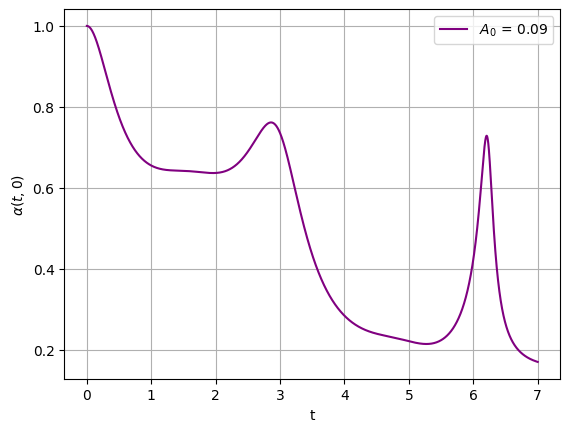

In [9]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
Alpha_origin_collapse = Alpha_origin

#plt.plot(t1, Alpha_origin_disp, color = "g", label = f"$A_0$ = 0.08")
plt.plot(t1, Alpha_origin_collapse, color = "purple", label = f"$A_0$ = 0.09")
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

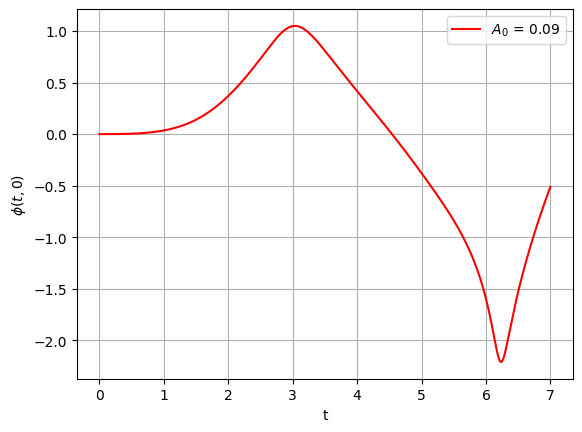

In [10]:
# Phi origin

#phi_origin_disp = phi_origin
phi_origin_collapse = phi_origin

#plt.plot(t1, phi_origin_disp, color = "b", label = f"$A_0$ = 0.08")
plt.plot(t1, phi_origin_collapse, color = "r", label = f"$A_0$ = 0.09")
plt.ylabel(r"$\phi(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $')

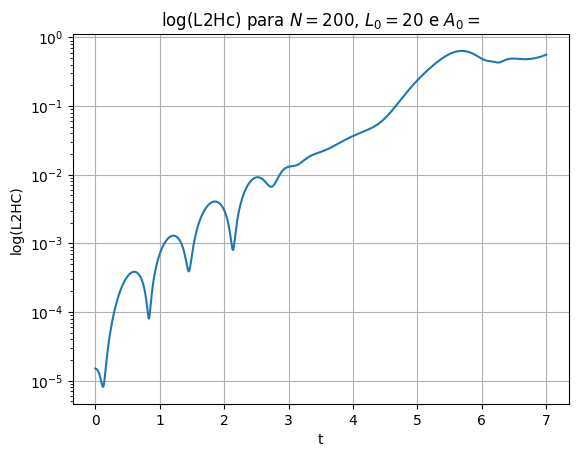

In [11]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title(r"log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

Text(0.5, 1.0, 'log(L2MC) para $N = 50$, $L_0 = 2$')

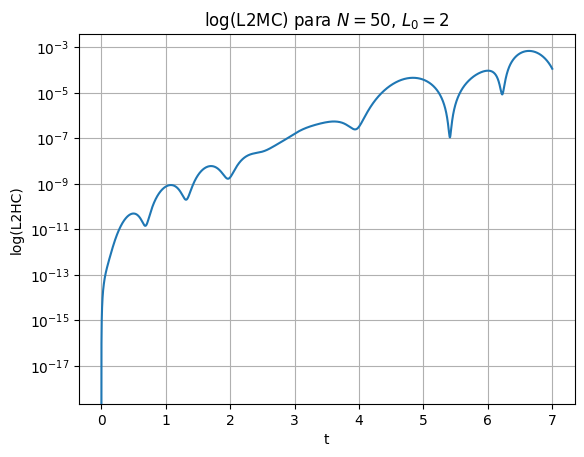

In [12]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title(r"log(L2MC) para $N = 50$, $L_0 = 2$")